# Evolution of $n_{sig}$ and $n_{bkg}$ according to the cut on the BDT (fit V5)

## Import

In [1]:
import numpy as np
import json

from bd2dst3pi.locations import loc
#from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle, plot_x_list_ys

from uncertainties import ufloat, unumpy, umath

Welcome to JupyROOT 6.22/02


## Load data

In [2]:
name_data = "data_strip_cutDeltaM_allPIDK"

In [12]:
l_BDT = [-0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2] # list of the cuts on the BDT which the data has been fit on

lB_K = []
lB_Ds = []
lB_pr = [] # partially reconstructed
lB = [] # Combi + K + Ds
lS = []

ltot = [] # S + B

squareRootlSplusB = []

for i, BDT in enumerate(l_BDT):   
    with open(f'{loc.JSON}/cut_allPIDK_BDT{BDT}_params.json', 'r') as f:
        params = json.load(f)
    
    LB_Ds.append(ufloat(params[f'n_sig_tau|{BDT}'],params[f'n_sig_tau|{BDT}_err'])) # sig
    
    lB.append(ufloat(params[f'n_bkg|{BDT}'],params[f'n_bkg|{BDT}_err'])) # combinatorial
    lB_pr.append(ufloat(params[f'n_bkg2|{BDT}'],params[f'n_bkg2|{BDT}_err'])) # partially reconstructed
    lB_K.append(ufloat(params[f'n_bkgK|{BDT}'],params[f'n_bkgK|{BDT}_err'])) # 2DstK2pi

    lB[i] += LB_Ds[i] + lB_pr[i] + lB_K[i]
    
    lS.append(ufloat(params[f'n_sig|{BDT}'],params[f'n_sig|{BDT}_err']))
    
    ltot.append(lS[i]+lB[i])
    squareRootlSplusB.append(umath.sqrt(ltot[i]))
    
lS = np.array(lS)
lB = np.array(lB)

## Define FoM

In [13]:
signal_purity = lS/ltot
signal_significance = lS/squareRootlSplusB
FoM = signal_purity*signal_significance

## Plot

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


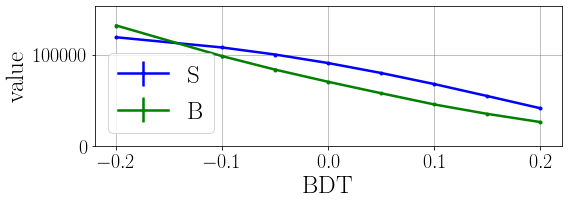

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/BDT_vs_S_B.pdf


In [14]:
plot_x_list_ys(l_BDT, [lS,lB], 'BDT', 
               ['S','B'],
               name_folder='data_strip_cutDeltaM')

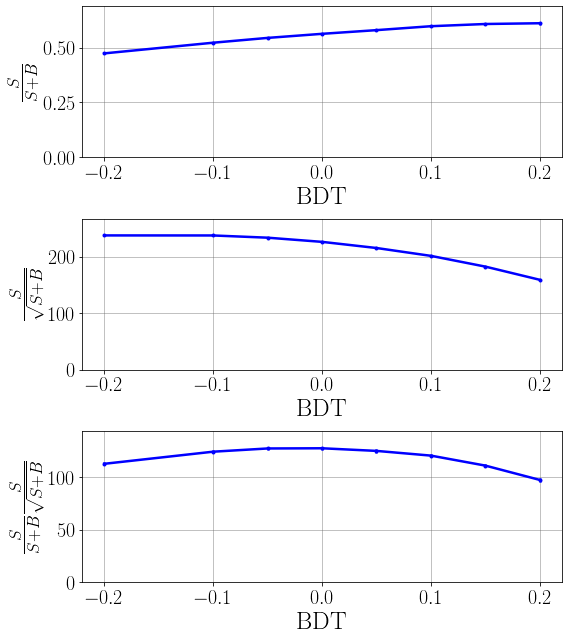

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM/BDT_vs_signal_purity_signal_significance_FoM.pdf


In [15]:
plot_x_list_ys(l_BDT, [[signal_purity],[signal_significance],[FoM]], 'BDT', 
               [['signal purity'],['signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='data_strip_cutDeltaM')